In [8]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

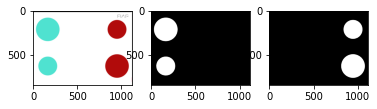

In [9]:
# Definir valores da máscara
image_lower_hsv_blue = np.array([80, 120, 120])  
image_upper_hsv_blue = np.array([90, 255, 255])
image_lower_hsv_red = np.array([0, 120, 120])  
image_upper_hsv_red = np.array([7, 255, 255])


mask_hsv_blue = cv2.inRange(img_hsv, image_lower_hsv_blue, image_upper_hsv_blue)
mask_hsv_red = cv2.inRange(img_hsv, image_lower_hsv_red, image_upper_hsv_red)


plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_hsv_blue, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(mask_hsv_red, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

In [10]:
contornos_blue, _ = cv2.findContours(mask_hsv_blue, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos_red, _ = cv2.findContours(mask_hsv_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask_rgb_blue = cv2.cvtColor(mask_hsv_blue, cv2.COLOR_GRAY2RGB)
mask_rgb_red = cv2.cvtColor(mask_hsv_red, cv2.COLOR_GRAY2RGB)
contornosblue_img = mask_rgb_blue.copy() 
contornosRed_img = mask_rgb_red.copy() # Cópia da máscara para ser desenhada "por cima"

print(contornos_red)

[array([[[ 937,  488]],

       [[ 936,  489]],

       [[ 927,  489]],

       [[ 926,  490]],

       [[ 921,  490]],

       [[ 920,  491]],

       [[ 917,  491]],

       [[ 916,  492]],

       [[ 912,  492]],

       [[ 911,  493]],

       [[ 909,  493]],

       [[ 908,  494]],

       [[ 906,  494]],

       [[ 905,  495]],

       [[ 902,  495]],

       [[ 901,  496]],

       [[ 900,  496]],

       [[ 899,  497]],

       [[ 897,  497]],

       [[ 896,  498]],

       [[ 895,  498]],

       [[ 894,  499]],

       [[ 892,  499]],

       [[ 891,  500]],

       [[ 890,  500]],

       [[ 889,  501]],

       [[ 888,  501]],

       [[ 887,  502]],

       [[ 886,  502]],

       [[ 885,  503]],

       [[ 884,  503]],

       [[ 883,  504]],

       [[ 882,  504]],

       [[ 880,  506]],

       [[ 879,  506]],

       [[ 878,  507]],

       [[ 877,  507]],

       [[ 875,  509]],

       [[ 874,  509]],

       [[ 872,  511]],

       [[ 871,  511]],

       [[ 869, 

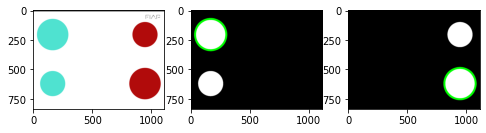

In [11]:
maior_red = None
maior_blue = None

maior_area_red = 0
maior_area_blue = 0

for c in contornos_red:
    area = cv2.contourArea(c)
    if area > maior_area_red:
        maior_area_red = area
        maior_red = c
        cnt_red = contornos_red[0]
        M_red = cv2.moments(cnt_red)

for d in contornos_blue:
    area = cv2.contourArea(d)
    if area > maior_area_blue:
        maior_area_blue = area
        maior_blue = d
        cnt_blue = contornos_blue[1]
        M_blue = cv2.moments(cnt_blue)

cv2.drawContours(contornosRed_img, [maior_red], -1, [0, 255, 0], 15)
cv2.drawContours(contornosblue_img, [maior_blue], -1, [0, 255, 0], 15)

plt.figure(figsize=(8,6))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.subplot(1, 3, 2)
plt.imshow(contornosblue_img, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(1, 3, 3)
plt.imshow(contornosRed_img, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

In [12]:
cx_blue = int(M_blue['m10']/M_blue['m00'])
cy_blue = int(M_blue['m01']/M_blue['m00'])

print("Massa do maior circulo azul na posição: ",cx_blue, cy_blue)

Massa do maior circulo azul na posição:  165 206


In [13]:
cx_red = int(M_red['m10']/M_red['m00'])
cy_red = int(M_red['m01']/M_red['m00'])

print("Massa do maior circulo vermelho na posição: ",cx_red, cy_red)

Massa do maior circulo vermelho na posição:  945 620


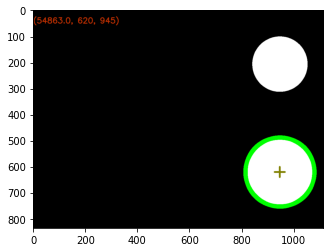

In [14]:
size = 20
color = (128,128,0)


cv2.line(contornosRed_img,(cx_red - size, cy_red),(cx_red + size, cy_red), color, 5)
cv2.line(contornosRed_img,(cx_red, cy_red - size),(cx_red, cy_red + size), color, 5)

#Definindo fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area_red, cy_red, cx_red
origem = (0,50)

cv2.putText(contornosRed_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)


plt.imshow(contornosRed_img);

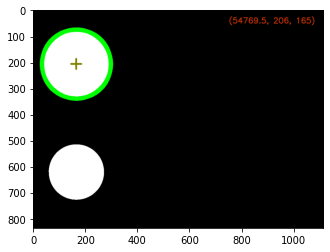

In [15]:
size = 20
color = (128,128,0)

cv2.line(contornosblue_img,(cx_blue - size,cy_blue),(cx_blue + size,cy_blue), color, 5)
cv2.line(contornosblue_img,(cx_blue, cy_blue - size),(cx_blue, cy_blue + size), color, 5)

# Definindo fonte 

font = cv2.FONT_HERSHEY_SIMPLEX
text = maior_area_blue, cy_blue , cx_blue
origem = (750,50)

cv2.putText(contornosblue_img, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(contornosblue_img);

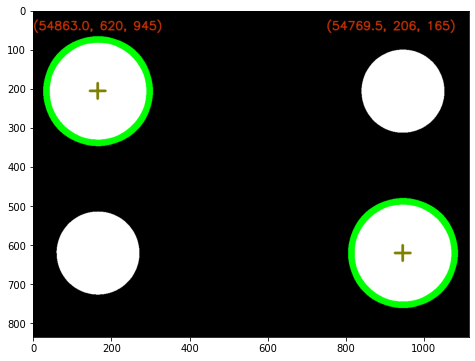

In [16]:
saida = cv2.bitwise_or(contornosRed_img, contornosblue_img)
plt.figure(figsize=(8,6))
plt.imshow(saida)
plt.show()

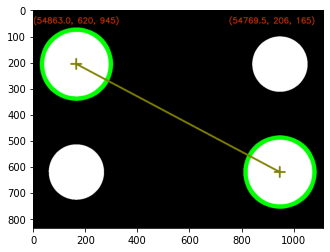

In [17]:
color = (128,128,0)

cv2.line(saida,(cx_red , cy_red),(cx_blue , cy_blue), color, 5)
plt.imshow(saida)
plt.show()

In [26]:
ponto01 = (cx_blue, cy_blue)
ponto02 = (cx_red, cy_red)

angulo01 = np.arctan2(*ponto01[::-1])
angulo02 = np.arctan2(*ponto02[::-1])

valor = 2*np.pi
angulo = angulo01 - angulo02

valorAngulo = np.rad2deg(angulo % valor)

print("Valor entre o centro das retas: ",
      int(valorAngulo))

Valor entre o centro das retas:  18


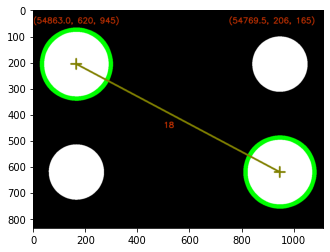

In [25]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = int(valorAngulo)
origem = (500,450)

cv2.putText(saida, str(text), origem, font,1,(200,50,0),2,cv2.LINE_AA)

plt.imshow(saida);

In [27]:
#Refencia, peguei o calculo aqui: https://stackoverflow.com/questions/31735499/calculate-angle-clockwise-between-two-points

In [28]:
#Mais os código apresentados em aula 

